In [1]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [2]:
useful_tags = ox.settings.useful_tags_path + ['cycleway'] #use railway for rail
ox.config(data_folder='data', logs_folder='logs', 
          imgs_folder='imgs', cache_folder='cache',
          use_cache=True, log_console=True, useful_tags_path=useful_tags)

In [3]:
def bike_network(city):
    try:
        G = ox.graph_from_place(city, network_type='all', simplify=False, which_result=1)
    except:
        G = ox.graph_from_place(city, network_type='all', simplify=False, which_result=2)
    non_cycleways = [(u, v, k) for u, v, k, d in G.edges(keys=True, data=True) if not ('cycleway' in d or d['highway']=='cycleway')]
    G.remove_edges_from(non_cycleways)
    G = ox.utils_graph.remove_isolated_nodes(G)
    G = ox.project_graph(G)
    return G

In [4]:
def get_new_bikelanes(G_new, G_old):
    """
    Get two graphs and return a list with the edge difference between G_new - G_old
    """
    N1 = list(G_new.nodes(data=False))
    N2 = list(G_old.nodes(data=False))
    G_new.add_nodes_from(N2)
    G_old.add_nodes_from(N1)
    D = nx.difference(G_new, G_old)
    return list(D.edges(data=True))

In [5]:
def new_edges(edges, new_links):
    """
    Identify the new edges in the edges geoDataFrame in a new column "new" where:
    0 = previously existing edge (bikelane) and 1 = new edge
    """
    edges['new'] = 0
    for i in new_links:
        edges.loc[edges[(edges['u']==i[0]) & (edges['v']==i[1])].index,['new']] = 1
    return edges

In [6]:
G_new = bike_network('Budapest, Hungary')
G_new = ox.project_graph(G_new,to_crs={'init': 'epsg:4326'})
G_old = ox.load_graphml('data/networks/Budapest_bike_original.graphml')
G_old = ox.simplify_graph(G_old)
G_old = ox.project_graph(G_old,to_crs={'init': 'epsg:4326'})

In [7]:
edges_new = ox.graph_to_gdfs(G_new, nodes=False)
edges_old = ox.graph_to_gdfs(G_old, nodes=False)

In [8]:
new_links = get_new_bikelanes(G_new, G_old)
edges_new = new_edges(edges_new, new_links)

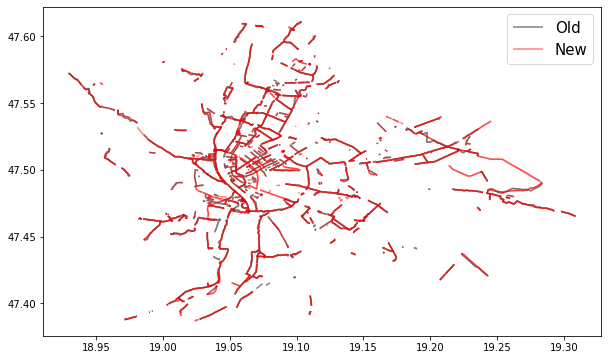

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
edges_old.plot(ax=ax,color='grey',zorder=1, alpha=1, label='Old')
edges_new[edges_new['new']==1].plot(ax=ax,color='red',zorder=2, alpha=0.5, label='New')
plt.legend(fontsize=15)
#plt.axis('off');

In [10]:
import keplergl
w1 = keplergl.KeplerGl(height=500)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [11]:
w1.add_data(data=edges_old, name="old")
w1.add_data(data=edges_new[edges_new['new']==1], name="new")
w1.add_data(data=edges_new, name="new_other")
w1

KeplerGl(data={'old': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,…

In [12]:
w1.save_to_html(file_name='bike_map.html', read_only=True)

Map saved to bike_map.html!


In [10]:
from shapely import geometry

To get the coordinates for the polygons use: http://apps.headwallphotonics.com/

In [11]:
coords = [(47.48489556845577, 19.069498457753216),
             (47.48469255737832, 19.070700087391888),
             (47.48881062862111, 19.071601309620892),
             (47.49356630914163, 19.071987547719036),
             (47.496088964842386, 19.071772970997845),
             (47.49811859983881, 19.071215071522747),
             (47.50026412867111, 19.069841780507122),
             (47.50240956982757, 19.067738928639447),
             (47.50388813364413, 19.065850653492962),
             (47.50498978157052, 19.06464902385429),
             (47.50765683343798, 19.061215796315228),
             (47.51014982459529, 19.057310499989544),
             (47.51122235412649, 19.055293478810345),
             (47.50974399689481, 19.054606833302532),
             (47.507453910341646, 19.05919877513603),
             (47.50475785761255, 19.062803664052044),
             (47.500308828111095, 19.067848007885082),
             (47.496908194904584, 19.070076942443848),
             (47.494310225185835, 19.070340187279456)]
pointList = [geometry.Point(c[1],c[0]) for c in coords]
poly = geometry.Polygon([[p.x, p.y] for p in pointList])

/Users/natera/anaconda3/envs/OSMNX/lib/python3.7/site-packages/geopandas/geoseries.py:358: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


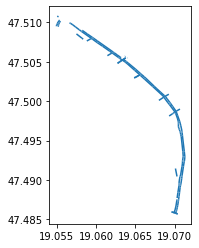

In [12]:
korut = gpd.clip(edges_new[edges_new['new']==1],poly)
korut.plot()

In [13]:
coords = [(47.47589972793168, 19.04150651093851),
          (47.47798815390122, 19.046828013624058),
          (47.47813318040009, 19.04800818559061),
          (47.477553072002685, 19.048415881360874),
          (47.47546462874014, 19.041935664380894),
          (47.474115798351036, 19.038480979169712),
          (47.47307151878779, 19.03502629395853),
          (47.47186767076379, 19.034167987073765),
          (47.47015612851018, 19.033846121991978),
          (47.464716535209, 19.034167987073765),
          (47.46322236170346, 19.03401778336893),
          (47.463178841450286, 19.033223849500523),
          (47.465340303815275, 19.033416968549595),
          (47.467983454435306, 19.03356717225443),
          (47.46998516581826, 19.03303073045145),
          (47.47153716492718, 19.03328822251688),
          (47.47332118204561, 19.033674460615025)]
pointList = [geometry.Point(c[1],c[0]) for c in coords]
poly = geometry.Polygon([[p.x, p.y] for p in pointList])

/Users/natera/anaconda3/envs/OSMNX/lib/python3.7/site-packages/geopandas/geoseries.py:358: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


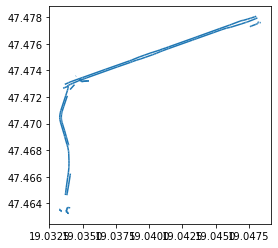

In [14]:
BartokBela = gpd.clip(edges_new[edges_new['new']==1],poly)
BartokBela.plot()

In [15]:
edges_temp = edges_old.append([korut,BartokBela],sort=False)
edges_temp.drop(edges_temp[edges_temp.geometry.geom_type == 'MultiLineString'].index, inplace=True)

In [16]:
nodes_old = ox.graph_to_gdfs(G_old, edges=False)
nodes_new = ox.graph_to_gdfs(G_new, edges=False)
nodes_temp = nodes_old.append(nodes_new,sort=False)
nodes_temp = nodes_temp[nodes_temp['x'].notna()]

In [17]:
G_pilot = ox.graph_from_gdfs(nodes_temp,edges_temp)

In [18]:
ox.save_graphml(G_pilot, 'data/networks/Budapest_ONLY_Bike_pilot.graphml')

In [19]:
G_ = ox.load_graphml('data/networks/Budapest_ONLY_Bike_pilot.graphml',node_type=float)

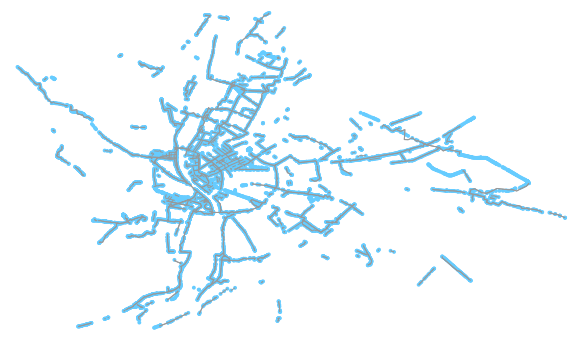

(<Figure size 734.018x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x179cecf60>)

In [20]:
ox.plot_graph(G_pilot)

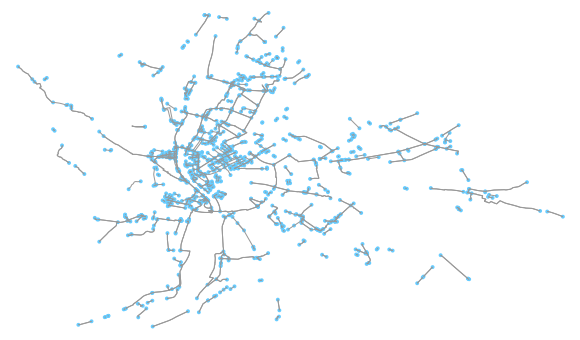

(<Figure size 731.059x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x158638278>)

In [24]:
ox.plot_graph(G_old)